In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
file_path = "/content/drive/MyDrive/Asnos_data/2024-02-05 1_03pm.csv" # All
df = pd.read_csv(file_path)
#df = df.drop("Unnamed: 0",axis=1)
df.head()

,DATE_DAY,PLATFORM,ACCOUNT_ID,ACCOUNT_NAME,CAMPAIGN_ID,CAMPAIGN_NAME,AD_GROUP_ID,AD_GROUP_NAME,AD_ID,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,2021-05-31,facebook_ads,27677371.0,ABC Corp EMEA,6.247976e+12,EMEA_Campaign5,6.247976e+12,NA_Tier5,6.247976e+12,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,2023-04-11,linkedin_ads,506553487.0,ABC Corp Global,6.143493e+08,EMEA_Campaign6,1.636556e+08,NA_Tier2,1.190163e+08,NA_Q1_CAMPAIGN,NaN,16.0,3.0,42,50,2.0,852.11
2,2020-07-16,linkedin_ads,506553487.0,ABC Corp Global,6.060588e+08,APJ_Campaign1,1.515408e+08,APJ_Tier1,1.050956e+08,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,2022-06-06,linkedin_ads,507488250.0,ABC Corp Global,6.162051e+08,APJ_Campaign5,1.681136e+08,APJ_Tier4,1.658333e+08,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,2022-04-03,linkedin_ads,506553487.0,ABC Corp APJ,6.107646e+08,EMEA_Campaign7,1.574266e+08,APJ_Tier5,1.024694e+08,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [69]:
# value_to_drop = 'NA_Campaign8' # Since only 1 value is present in the dataset, if it is needed delete this code block

# # Drop rows with the specified value
# df = df[df['CAMPAIGN_NAME'] != value_to_drop]

In [70]:
df.shape

(908825, 17)

In [71]:
# df.CLICKS.value_counts()
# df.IMPRESSIONS.value_counts()
# df.SPEND.value_counts()
# df.AD_NAME.value_counts()
# df.AD_GROUP_NAME.value_counts()
# df.CAMPAIGN_NAME.value_counts() # 21 1 outlier
# df.ACCOUNT_NAME.value_counts()
# df.ACCOUNT_ID.value_counts()
# df.PLATFORM.value_counts()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908825 entries, 0 to 908824
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DATE_DAY       908825 non-null  object 
 1   PLATFORM       908825 non-null  object 
 2   ACCOUNT_ID     908824 non-null  float64
 3   ACCOUNT_NAME   908824 non-null  object 
 4   CAMPAIGN_ID    908824 non-null  float64
 5   CAMPAIGN_NAME  908824 non-null  object 
 6   AD_GROUP_ID    908822 non-null  float64
 7   AD_GROUP_NAME  908825 non-null  object 
 8   AD_ID          908813 non-null  float64
 9   AD_NAME        908823 non-null  object 
 10  CLICKS         582339 non-null  float64
 11  IMPRESSIONS    851803 non-null  float64
 12  SPEND          851758 non-null  float64
 13  REACH          908825 non-null  int64  
 14  LEAD           908825 non-null  int64  
 15  CONVERSION     908825 non-null  float64
 16  REVENUE        908825 non-null  float64
dtypes: float64(9), int64(2), obje

In [73]:
# Useful features used for clustering
features = ['DATE_DAY','PLATFORM', 'ACCOUNT_NAME',
       'CAMPAIGN_NAME', 'AD_GROUP_NAME','AD_NAME',
       'CLICKS', 'IMPRESSIONS', 'SPEND', "REACH", "LEAD", "CONVERSION", "REVENUE"]

In [74]:
df2 = df[features]
df2.head()

,DATE_DAY,PLATFORM,ACCOUNT_NAME,CAMPAIGN_NAME,AD_GROUP_NAME,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,2021-05-31,facebook_ads,ABC Corp EMEA,EMEA_Campaign5,NA_Tier5,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,2023-04-11,linkedin_ads,ABC Corp Global,EMEA_Campaign6,NA_Tier2,NA_Q1_CAMPAIGN,NaN,16.0,3.0,42,50,2.0,852.11
2,2020-07-16,linkedin_ads,ABC Corp Global,APJ_Campaign1,APJ_Tier1,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,2022-06-06,linkedin_ads,ABC Corp Global,APJ_Campaign5,APJ_Tier4,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,2022-04-03,linkedin_ads,ABC Corp APJ,EMEA_Campaign7,APJ_Tier5,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [75]:
# //N is beign read as ////N
# Chaning ////N to 0.1 for converting the ////N values to median of the column
# We can't change value to None since None cannot be used to change type of the column
df_test = df2.copy()
cat_to_num = ["CLICKS","IMPRESSIONS","SPEND"]
df_test[cat_to_num] = df_test[cat_to_num].replace("\\\\N",0.1)
df_test[cat_to_num] = df_test[cat_to_num].astype(float)

In [76]:
# Replacing 0.1 with median value in the column
for col in cat_to_num:
  df_test[col] = df_test[col].replace(0.1, np.median(df_test[col]))

In [77]:
df_test.head()

,DATE_DAY,PLATFORM,ACCOUNT_NAME,CAMPAIGN_NAME,AD_GROUP_NAME,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,2021-05-31,facebook_ads,ABC Corp EMEA,EMEA_Campaign5,NA_Tier5,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,2023-04-11,linkedin_ads,ABC Corp Global,EMEA_Campaign6,NA_Tier2,NA_Q1_CAMPAIGN,NaN,16.0,3.0,42,50,2.0,852.11
2,2020-07-16,linkedin_ads,ABC Corp Global,APJ_Campaign1,APJ_Tier1,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,2022-06-06,linkedin_ads,ABC Corp Global,APJ_Campaign5,APJ_Tier4,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,2022-04-03,linkedin_ads,ABC Corp APJ,EMEA_Campaign7,APJ_Tier5,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


## Feature Engineering

In [78]:
df_test["DATE_DAY"] = pd.to_datetime(df_test["DATE_DAY"])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908825 entries, 0 to 908824
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DATE_DAY       908825 non-null  datetime64[ns]
 1   PLATFORM       908825 non-null  object        
 2   ACCOUNT_NAME   908824 non-null  object        
 3   CAMPAIGN_NAME  908824 non-null  object        
 4   AD_GROUP_NAME  908825 non-null  object        
 5   AD_NAME        908823 non-null  object        
 6   CLICKS         582339 non-null  float64       
 7   IMPRESSIONS    851803 non-null  float64       
 8   SPEND          851758 non-null  float64       
 9   REACH          908825 non-null  int64         
 10  LEAD           908825 non-null  int64         
 11  CONVERSION     908825 non-null  float64       
 12  REVENUE        908825 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 90.1+ MB


In [79]:
df_test.head()

,DATE_DAY,PLATFORM,ACCOUNT_NAME,CAMPAIGN_NAME,AD_GROUP_NAME,AD_NAME,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,2021-05-31,facebook_ads,ABC Corp EMEA,EMEA_Campaign5,NA_Tier5,NA_Q2_CAMPAIGN,0.0,46.0,2.0,51,43,5.0,228.96
1,2023-04-11,linkedin_ads,ABC Corp Global,EMEA_Campaign6,NA_Tier2,NA_Q1_CAMPAIGN,NaN,16.0,3.0,42,50,2.0,852.11
2,2020-07-16,linkedin_ads,ABC Corp Global,APJ_Campaign1,APJ_Tier1,EMEA_Q1_CAMPAIGN,3.0,254.0,27.0,89,25,14.0,38.49
3,2022-06-06,linkedin_ads,ABC Corp Global,APJ_Campaign5,APJ_Tier4,NA_Q2_CAMPAIGN,94.0,46.0,27.0,49,34,0.0,204.50
4,2022-04-03,linkedin_ads,ABC Corp APJ,EMEA_Campaign7,APJ_Tier5,NA_Q1_CAMPAIGN,3.0,473.0,15.0,15,26,1.0,864.18


In [80]:
# Extract date, month, year from date column
df_test["month"] = df_test["DATE_DAY"].dt.month
df_test["year"] = df_test["DATE_DAY"].dt.year

In [81]:
# get the day of week
df_test["DayOfWeek"] = df_test["DATE_DAY"].dt.weekday
# check if the date is weekend or not
df_test["IsWeekend"] = df_test["DayOfWeek"] >= 5

In [82]:
# Re-arranging the columns
df_test = df_test[["DATE_DAY", "month", "year", "DayOfWeek", "IsWeekend", "CLICKS", "IMPRESSIONS", "SPEND","REACH", "LEAD","CONVERSION","REVENUE"]]

In [83]:
df_test.head()

,DATE_DAY,month,year,DayOfWeek,IsWeekend,CLICKS,IMPRESSIONS,SPEND,REACH,LEAD,CONVERSION,REVENUE
0,2021-05-31,5,2021,0,False,0.0,46.0,2.0,51,43,5.0,228.96
1,2023-04-11,4,2023,1,False,NaN,16.0,3.0,42,50,2.0,852.11
2,2020-07-16,7,2020,3,False,3.0,254.0,27.0,89,25,14.0,38.49
3,2022-06-06,6,2022,0,False,94.0,46.0,27.0,49,34,0.0,204.50
4,2022-04-03,4,2022,6,True,3.0,473.0,15.0,15,26,1.0,864.18


## Temporal analysis

In [84]:
def insight_graph(col, df_test=df_test, kind="bar"):
  # Columns needed for insights
  insights = ["CLICKS",	"IMPRESSIONS", "SPEND"]

  # Grouping the necessary columns for plotting
  res_clicks = df_test.groupby(col)[insights[0]].sum() # CLICKS
  res_impressions = df_test.groupby(col)[insights[1]].sum() # IMPRESSIONS
  res_spend = df_test.groupby(col)[insights[2]].sum() # SPEND

  # Plotting the results
  plt.figure(figsize= (15, 5))

  # Subplot 1
  plt.subplot(1, 3, 1)
  res_clicks.plot(kind=kind, color="skyblue")
  plt.title(f"Impact of {col} on CLICKS")

  # Subplot 2
  plt.subplot(1, 3, 2)
  res_impressions.plot(kind=kind, color="lightgreen")
  plt.title(f"Impact of {col} on IMPRESSIONS")
  # plt.ticklabel_format(axis='y', style='plain')  # Uncommenting this will remove 1e6 on the graph which stands for 10Lakhs

  # Subplot 3
  plt.subplot(1, 3, 3)
  res_spend.plot(kind=kind, color="red")
  plt.title(f"Impact of {col} on SPEND")

### Analysis using Single Column

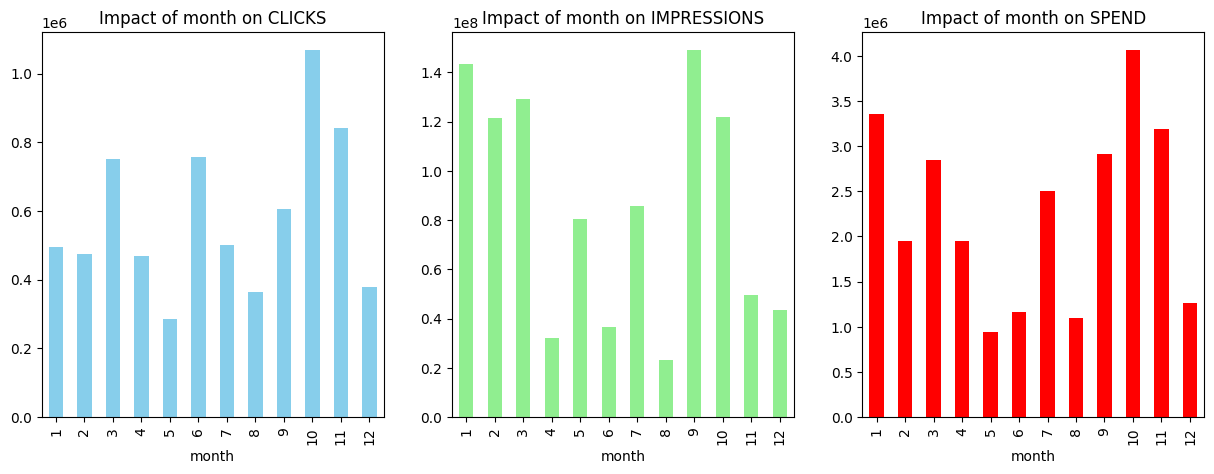

In [85]:
insight_graph("month")

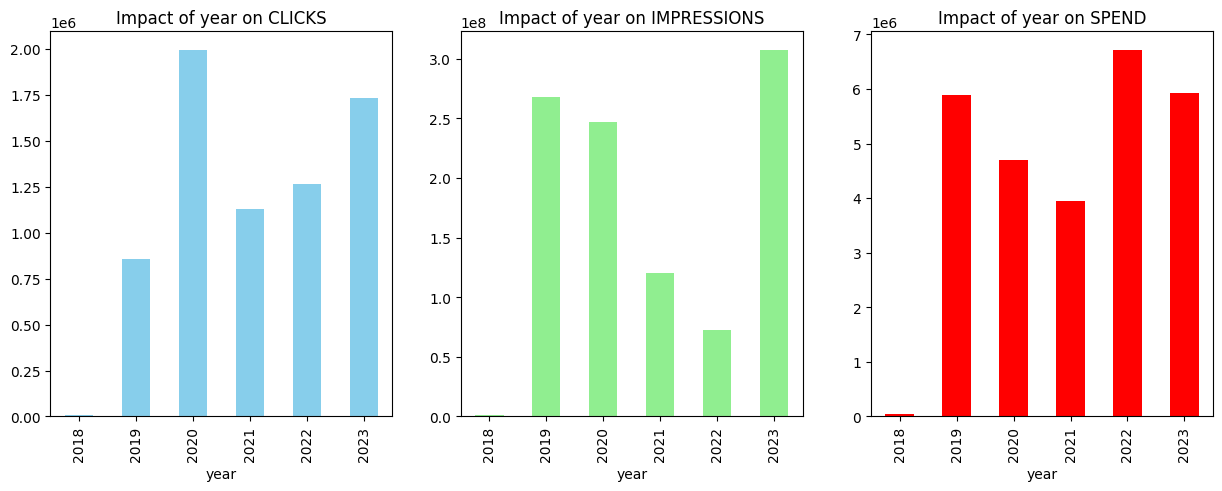

In [86]:
insight_graph("year")

In [87]:
df_test["year"].value_counts()

2023    207365
2022    205384
2020    202812
2021    197303
2019     93315
2018      2646
Name: year, dtype: int64

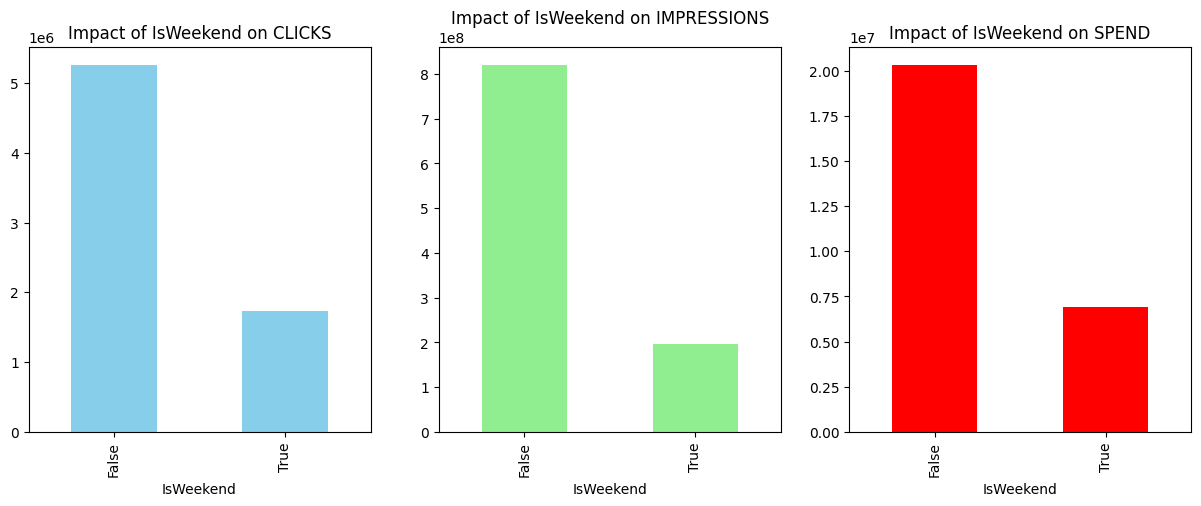

In [88]:
insight_graph("IsWeekend")

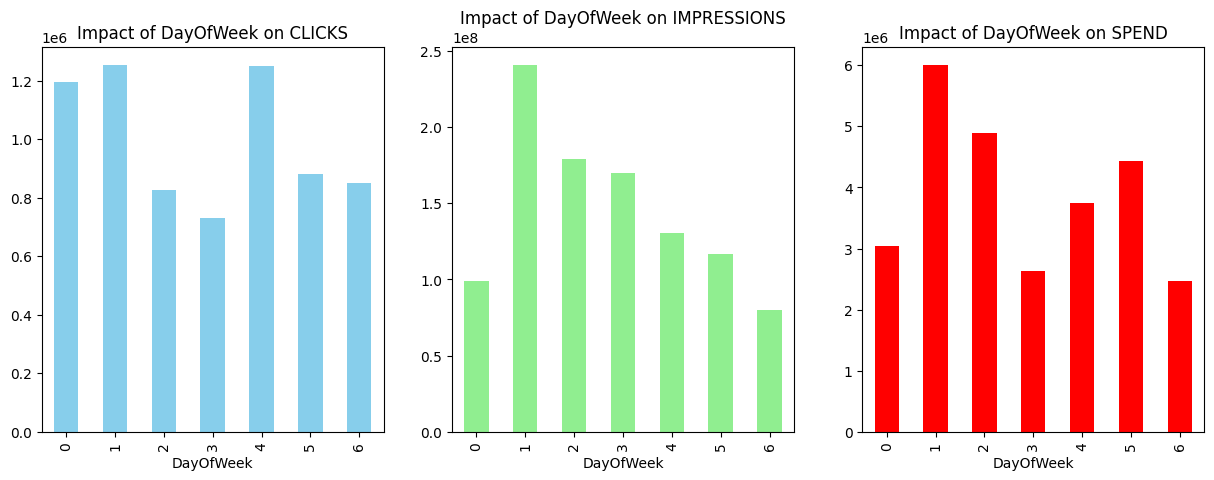

In [89]:
insight_graph("DayOfWeek")
# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

In [90]:
def insight_graph2(col, df_test=df_test, kind="bar"):
  # Columns needed for insights
  insights = ["REACH", "LEAD","CONVERSION","REVENUE"]

  # Grouping the necessary columns for plotting
  res_reach = df_test.groupby(col)[insights[0]].sum()
  res_lead = df_test.groupby(col)[insights[1]].sum()
  res_conversion = df_test.groupby(col)[insights[2]].sum()
  res_revenue = df_test.groupby(col)[insights[3]].sum()

  # Plotting the results
  plt.figure(figsize= (15, 5))

  # Subplot 1
  plt.subplot(1, 4, 1)
  res_reach.plot(kind=kind, color="skyblue")
  plt.title(f"Impact of {col} on REACH")

  # Subplot 2
  plt.subplot(1, 4, 2)
  res_lead.plot(kind=kind, color="lightgreen")
  plt.title(f"Impact of {col} on LEAD")
  # plt.ticklabel_format(axis='y', style='plain')  # Uncommenting this will remove 1e6 on the graph which stands for 10Lakhs

  # Subplot 3
  plt.subplot(1, 4, 3)
  res_conversion.plot(kind=kind, color="red")
  plt.title(f"Impact of {col} on CONVERSION")

  # Subplot 4
  plt.subplot(1, 4, 4)
  res_conversion.plot(kind=kind, color="brown")
  plt.title(f"Impact of {col} on REVENUE")

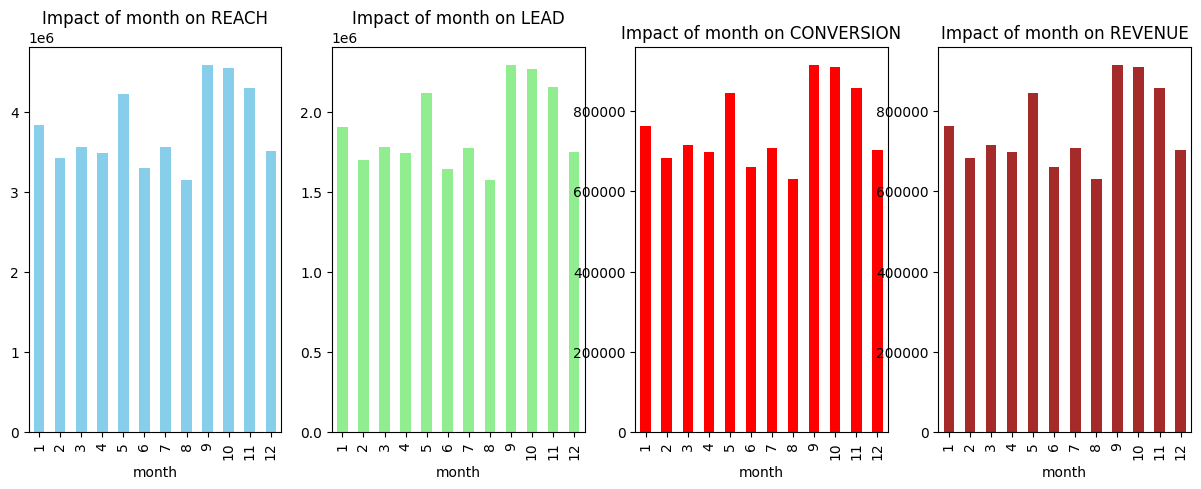

In [91]:
insight_graph2("month")

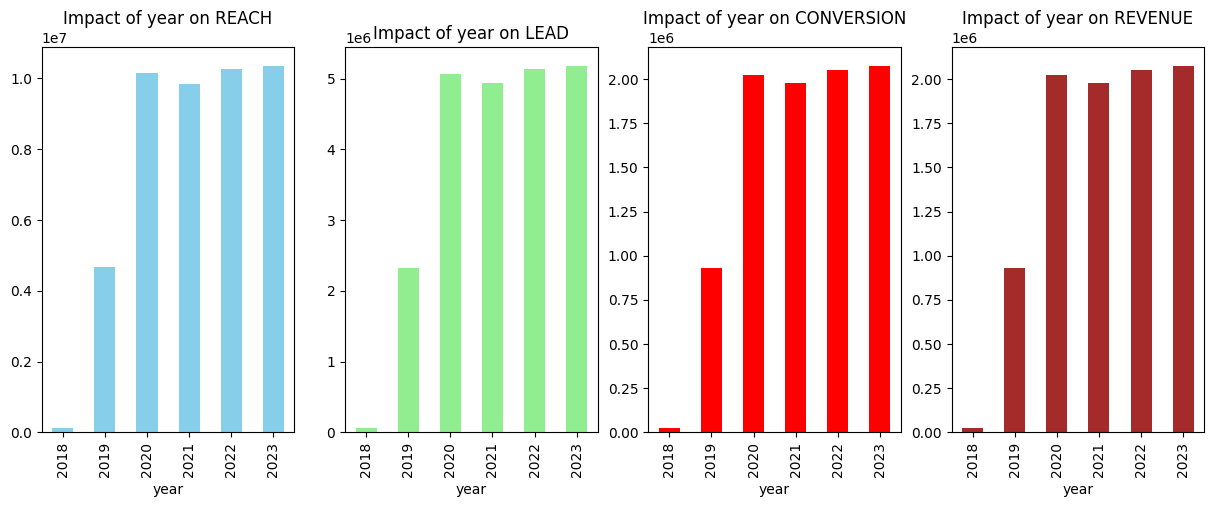

In [93]:
insight_graph2("year")

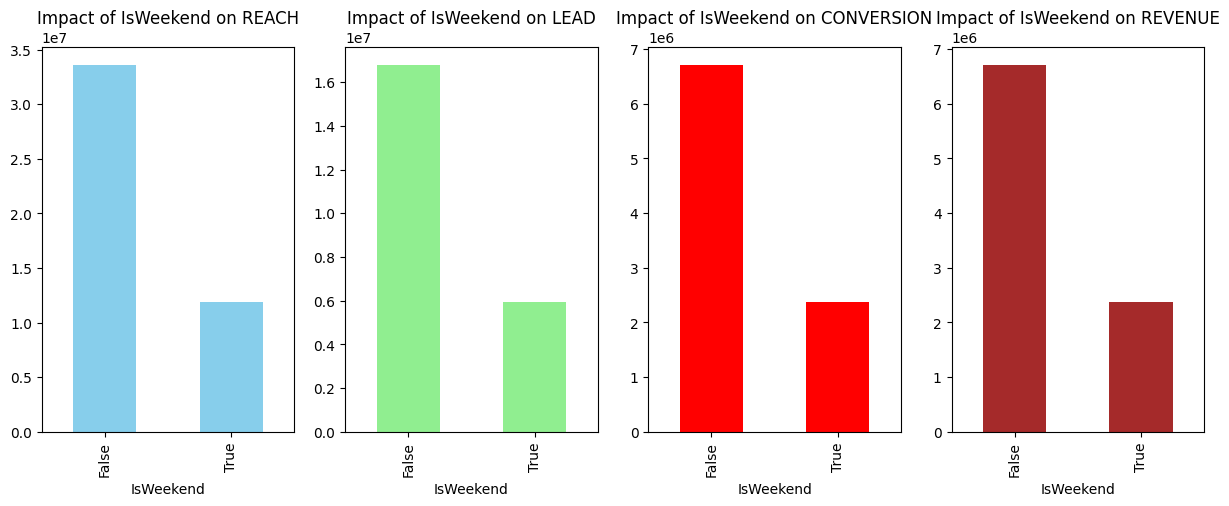

In [94]:
insight_graph2("IsWeekend")

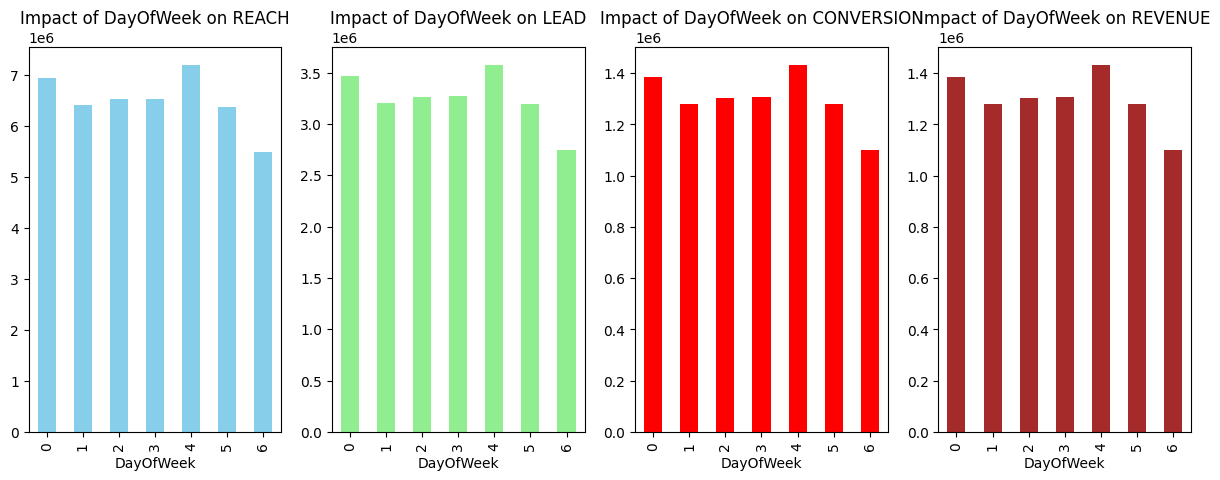

In [95]:
insight_graph2("DayOfWeek")